In [1]:
import numpy as np
import torch
import cupy as cu
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
arr = torch.rand(100, 100, device=device)
arr[25:50, 25:50] = 1
arr

tensor([[0.5584, 0.3998, 0.6445,  ..., 0.2113, 0.1303, 0.3261],
        [0.5588, 0.6109, 0.7346,  ..., 0.3025, 0.2821, 0.4481],
        [0.8710, 0.9085, 0.3414,  ..., 0.4393, 0.8065, 0.3596],
        ...,
        [0.6949, 0.4888, 0.1471,  ..., 0.2185, 0.9910, 0.2862],
        [0.2154, 0.3939, 0.3544,  ..., 0.3441, 0.9193, 0.1991],
        [0.5092, 0.8068, 0.5778,  ..., 0.2271, 0.4468, 0.4681]],
       device='cuda:0')

In [5]:
# plt.imshow(arr.cpu().numpy())

In [6]:
cust_filter = torch.tensor([[[0, 1, 0], [0, -1, 0], [0, 0, 0]], 
                            [[0, 0, 0], [0, -1, 1], [0, 0, 0]],
                            [[0, 0, 0], [0, -1, 0], [0, 1, 0]],
                            [[0, 0, 0], [1, -1, 0], [0, 0, 0]]], device=device, dtype=torch.float)

In [7]:
cust_filter, cust_filter.shape

(tensor([[[ 0.,  1.,  0.],
          [ 0., -1.,  0.],
          [ 0.,  0.,  0.]],
 
         [[ 0.,  0.,  0.],
          [ 0., -1.,  1.],
          [ 0.,  0.,  0.]],
 
         [[ 0.,  0.,  0.],
          [ 0., -1.,  0.],
          [ 0.,  1.,  0.]],
 
         [[ 0.,  0.,  0.],
          [ 1., -1.,  0.],
          [ 0.,  0.,  0.]]], device='cuda:0'),
 torch.Size([4, 3, 3]))

In [8]:
result = torch.nn.functional.conv2d(input=arr[None, None, ...], weight=cust_filter[:, None], padding=1)
result = result[0]
result[0, 0, :] = 0
result[1, :, -1] = 0
result[2, -1, :] = 0
result[3, :, 0] = 0
result, result.shape

(tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [-4.2474e-04, -2.1116e-01, -9.0072e-02,  ..., -9.1209e-02,
           -1.5178e-01, -1.2198e-01],
          [-3.1225e-01, -2.9759e-01,  3.9323e-01,  ..., -1.3676e-01,
           -5.2440e-01,  8.8478e-02],
          ...,
          [-5.2767e-01,  8.1858e-02,  3.9261e-01,  ...,  3.4653e-01,
           -7.7169e-01,  6.8218e-01],
          [ 4.7946e-01,  9.4911e-02, -2.0728e-01,  ..., -1.2566e-01,
            7.1757e-02,  8.7183e-02],
          [-2.9385e-01, -4.1289e-01, -2.2344e-01,  ...,  1.1706e-01,
            4.7245e-01, -2.6905e-01]],
 
         [[-1.5860e-01,  2.4476e-01,  1.9192e-01,  ..., -8.0976e-02,
            1.9582e-01,  0.0000e+00],
          [ 5.2136e-02,  1.2367e-01, -3.2047e-01,  ..., -2.0406e-02,
            1.6602e-01,  0.0000e+00],
          [ 3.7477e-02, -5.6715e-01,  3.6330e-01,  ...,  3.6723e-01,
           -4.4685e-01,  0.0000e+00],
          ...,
    

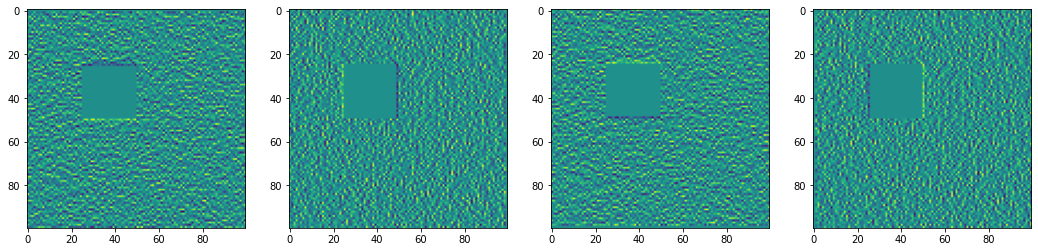

In [9]:
plt.rcParams['figure.figsize'] = [18, 12]
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(result[i].cpu().numpy())

In [10]:
square = torch.ones_like(result)
square[:-1] += result[:-1] ** 2 + result[1:] ** 2
square[-1] +=  result[0] ** 2 + result[-1] ** 2
square = torch.sqrt(square) / 2

In [11]:
square, square.shape

(tensor([[[0.5062, 0.5148, 0.5091,  ..., 0.5016, 0.5095, 0.5000],
          [0.5007, 0.5148, 0.5270,  ..., 0.5022, 0.5125, 0.5037],
          [0.5241, 0.5938, 0.5671,  ..., 0.5370, 0.6072, 0.5020],
          ...,
          [0.5747, 0.5300, 0.6083,  ..., 0.6552, 0.7232, 0.6053],
          [0.5616, 0.5026, 0.5767,  ..., 0.5802, 0.6172, 0.5019],
          [0.5420, 0.5529, 0.5237,  ..., 0.5153, 0.5531, 0.5178]],
 
         [[0.5062, 0.5255, 0.5111,  ..., 0.5037, 0.5151, 0.5037],
          [0.5245, 0.5253, 0.5607,  ..., 0.5048, 0.5706, 0.5020],
          [0.5222, 0.6691, 0.5899,  ..., 0.5474, 0.5495, 0.5023],
          ...,
          [0.5640, 0.5305, 0.5850,  ..., 0.6350, 0.6128, 0.5019],
          [0.5287, 0.5413, 0.5783,  ..., 0.5798, 0.6599, 0.5178],
          [0.5217, 0.5129, 0.5117,  ..., 0.5119, 0.5001, 0.5000]],
 
         [[0.5000, 0.5171, 0.5167,  ..., 0.5033, 0.5073, 0.5131],
          [0.5238, 0.5223, 0.5408,  ..., 0.5153, 0.5647, 0.5088],
          [0.5218, 0.6063, 0.6288,  ...,

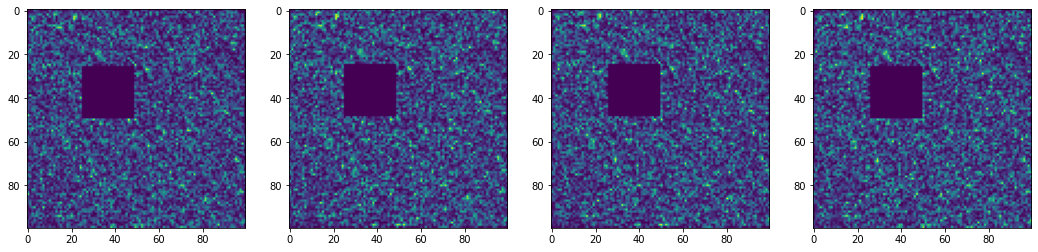

In [12]:
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(square[i].cpu().numpy())

In [13]:
square[0, 0, :] = 0
square[1, :, -1] = 0
square[2, -1, :] = 0
square[3, :, 0] = 0

In [14]:
vertex_area = square.sum(axis=0)

In [15]:
vertex_area, vertex_area.shape

(tensor([[1.0062, 1.5489, 1.5426,  ..., 1.5082, 1.5241, 1.0226],
         [1.5489, 2.0741, 2.1343,  ..., 2.0350, 2.1536, 1.5230],
         [1.5682, 2.3911, 2.3933,  ..., 2.2156, 2.2849, 1.6011],
         ...,
         [1.6931, 2.0853, 2.2954,  ..., 2.4254, 2.7092, 1.9189],
         [1.6115, 2.1023, 2.1787,  ..., 2.1906, 2.4784, 1.7503],
         [1.0636, 1.6269, 1.5604,  ..., 1.5307, 1.6170, 1.0357]],
        device='cuda:0'),
 torch.Size([100, 100]))

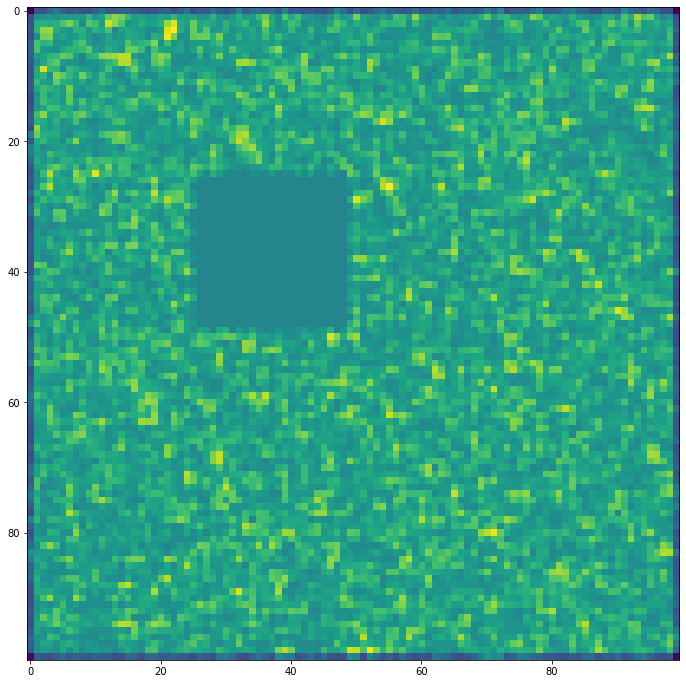

In [16]:
plt.imshow(vertex_area.cpu().numpy())

In [17]:
del square, arr
torch.cuda.empty_cache()